## For this project We will visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help us understand the patterns in visits and identify yearly and monthly growth.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("fcc-forum-pageviews.csv",parse_dates=["date"],index_col="date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [ ]:
df.describe()

              value
count  1.304000e+03
mean   6.722068e+04
std    5.933964e+04
min    1.201000e+03
25%    3.575775e+04
50%    5.719750e+04
75%    8.388300e+04
max    1.173655e+06

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


<AxesSubplot: xlabel='date'>

<Figure size 640x480 with 1 Axes>

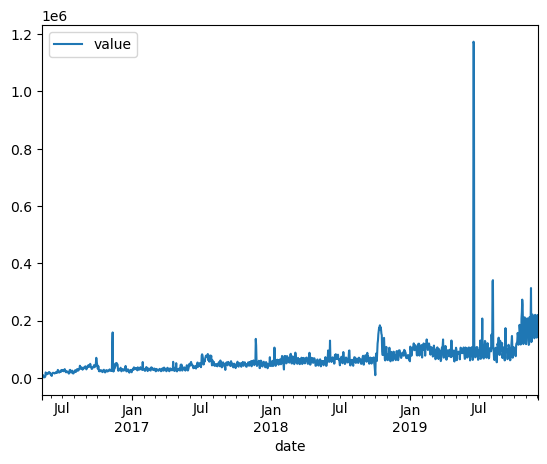

In [ ]:
df.plot(kind="line")

## Cleaning the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [ ]:
df = df[df.value<(df.value.quantile(0.975))]
df = df[df.value>(df.value.quantile(0.025))]
df

             value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1239 rows x 1 columns]

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<AxesSubplot: xlabel='date'>

<Figure size 640x480 with 1 Axes>

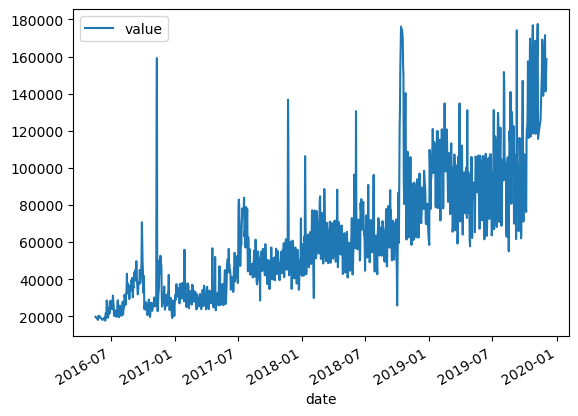

In [ ]:
df.plot(kind="line")

<Figure size 1600x500 with 1 Axes>

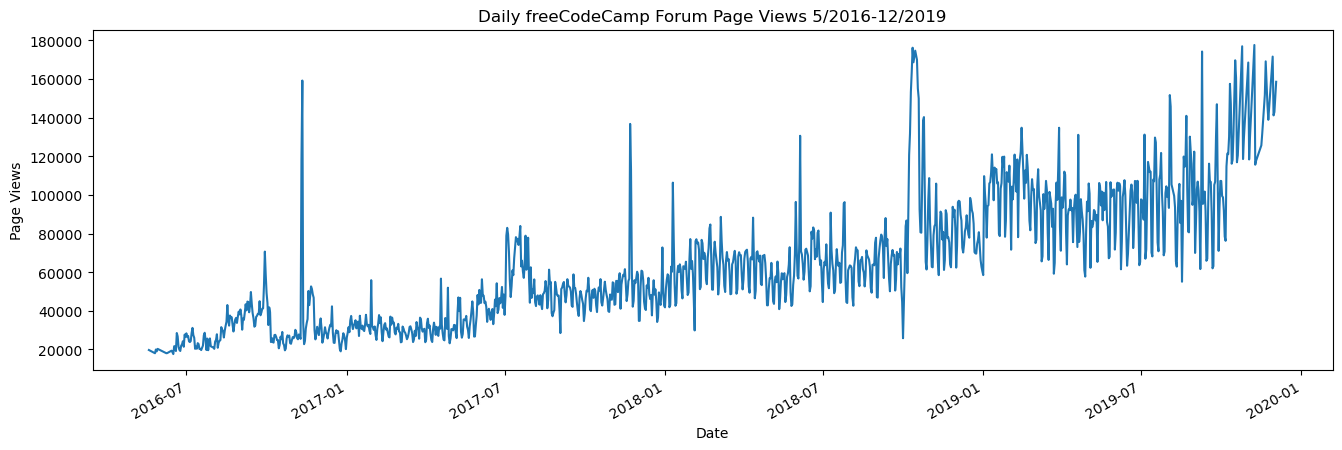

<Figure size 1600x500 with 1 Axes>

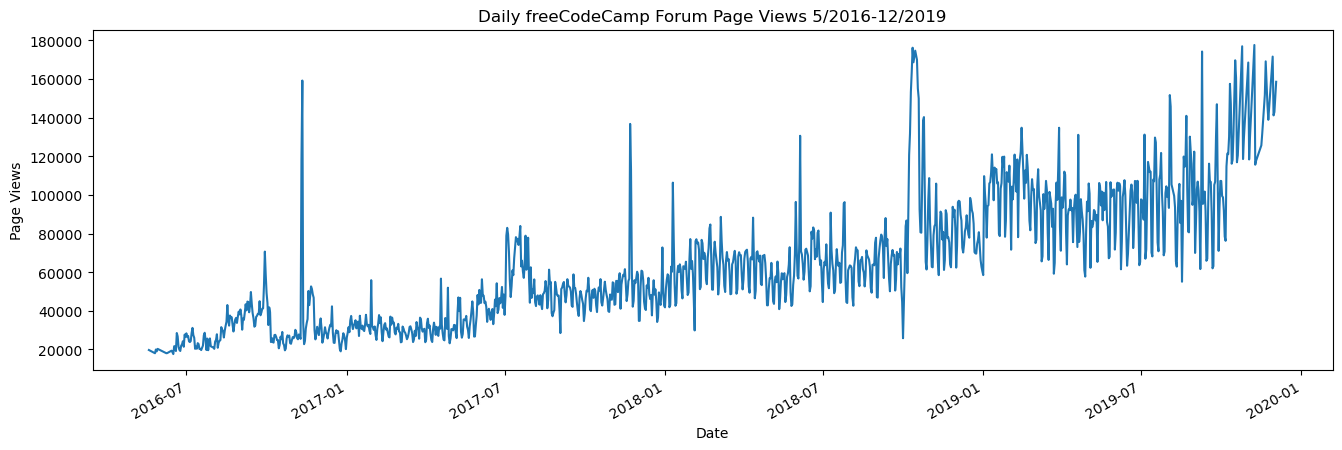

In [ ]:
def draw_line_plot():
    fig,ax = plt.subplots(figsize=(16,5))
    df.value.plot(kind="line",ax=ax)
    ax.set_ylabel("Page Views")
    ax.set_xlabel("Date")
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    fig.savefig('line_plot.png')
    return fig
draw_line_plot()

## Creating a function that draws a bar chart. It will show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months.

<Figure size 1400x1200 with 1 Axes>

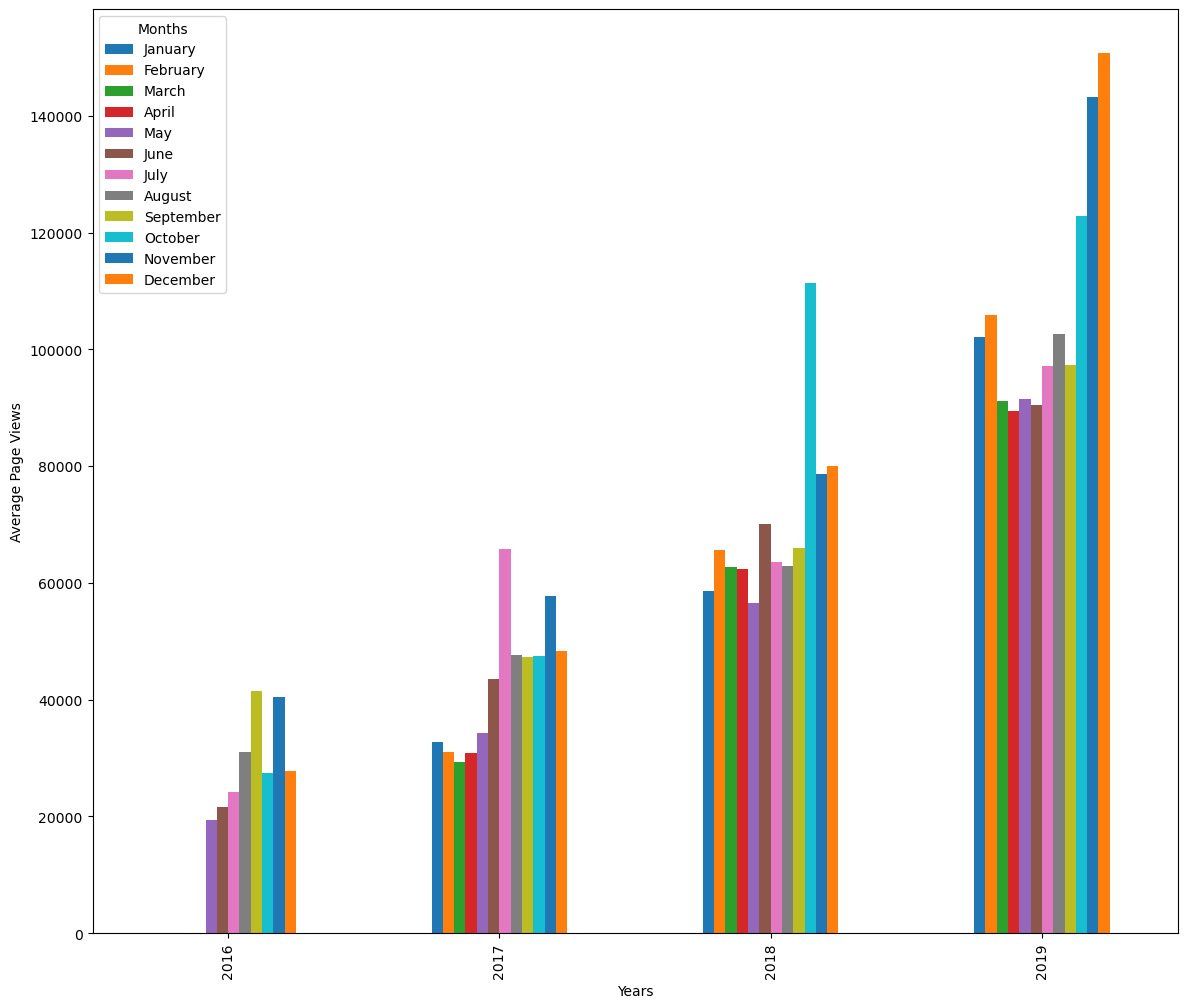

<Figure size 1400x1200 with 1 Axes>

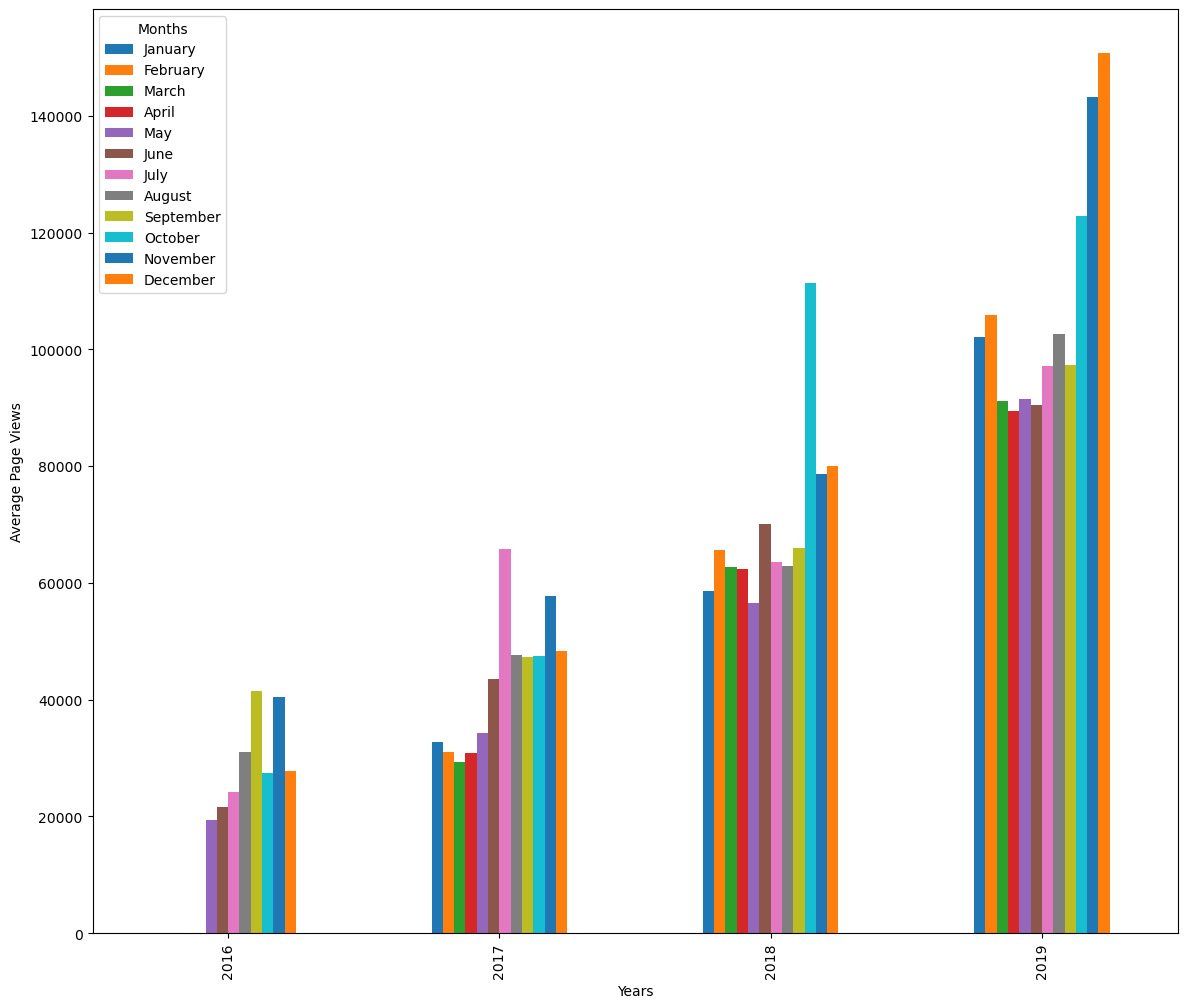

In [ ]:
def draw_bar_plot():
    df_bar = df.copy()
    df_bar['Year'] = pd.DatetimeIndex(df_bar.index).year
    df_bar['Month'] = pd.DatetimeIndex(df_bar.index).month
    df_bar = df_bar.groupby(["Year","Month"])['value'].mean()
    df_bar = df_bar.unstack()
    df_bar
    month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July',
                 'August', 'September', 'October', 'November', 'December']
    fig,ax = plt.subplots(figsize=(14,12))
    df_bar.plot(kind="bar",ax=ax)
    ax.set_ylabel("Average Page Views")
    ax.set_xlabel("Years")
    ax.legend(title="Months",labels=month_names)
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()

## Creating a draw_box_plot function that uses Seaborn to draw two adjacent box plots. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality).

<Figure size 1400x500 with 2 Axes>

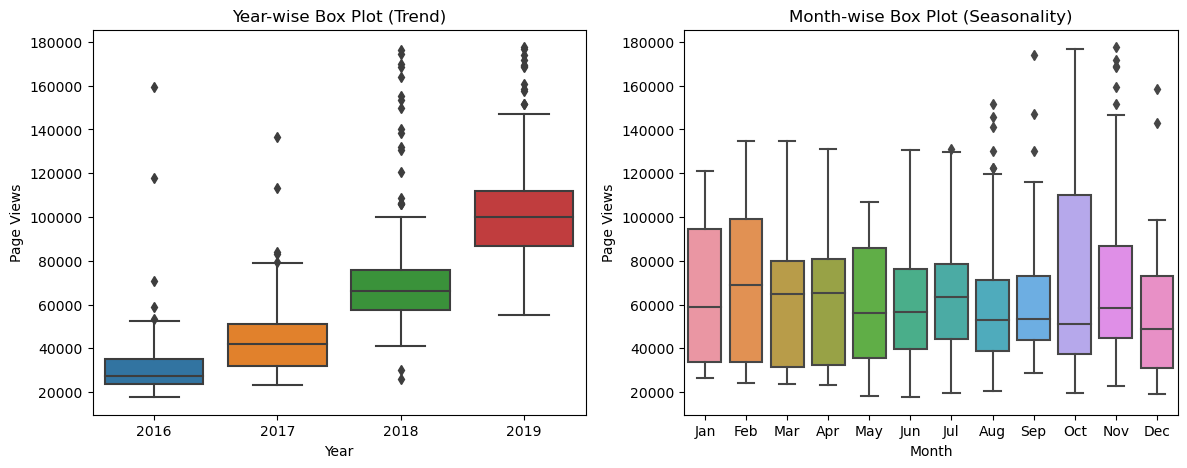

<Figure size 1400x500 with 2 Axes>

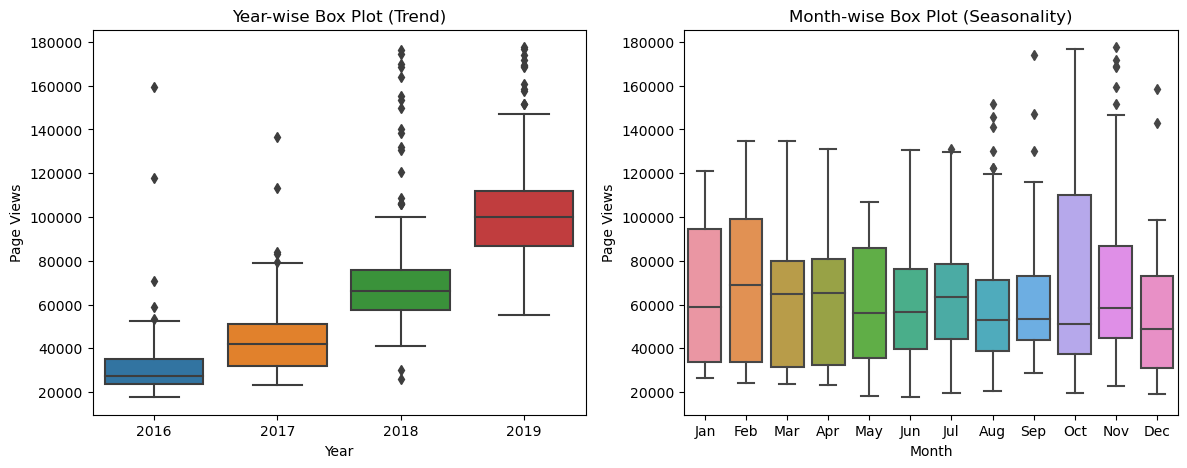

In [ ]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box['Month'] = pd.DatetimeIndex(df_box['date']).month
    # Draw box plots (using Seaborn)
    fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,5))
    sns.boxplot(df_box,x="year",y="value",ax=ax1).set(xlabel="Year",ylabel="Page Views",title="Year-wise Box Plot (Trend)")
    sns.boxplot(df_box.sort_values(by="Month"),x="month",y="value",ax=ax2).set(xlabel="Month",ylabel="Page Views",title="Month-wise Box Plot (Seasonality)")
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()